# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [103]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

with open('yearinfo.json', 'r') as file:
    yearinfo = json.load(file)
print(yearinfo)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

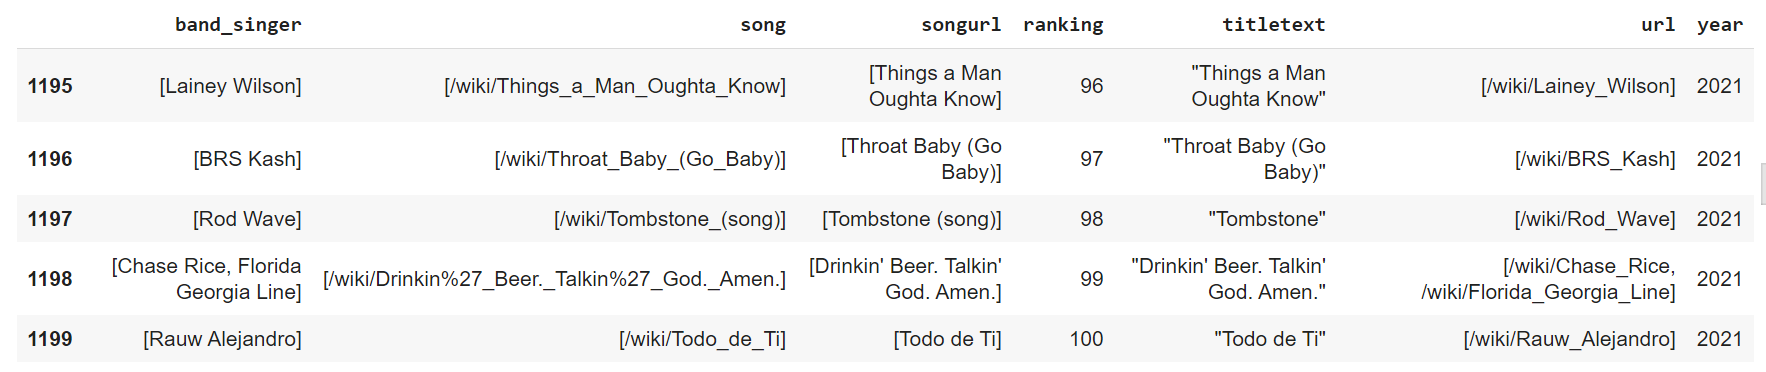

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [104]:
#write your code here
#creating list
data_list = []
for key, values in yearinfo.items():
  for i in values:
    data_list.append(list(i.values()) + [key])

In [105]:
#data_list created
type(data_list)

list

In [106]:
#Converting data_list to dataframe
df = pd.DataFrame(data_list)
df.head()

0                                            1  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                       2  3                   4  \
0                       [Tik Tok (song)]  1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]  2      "Need You Now"   
2                     [Hey, Soul Sister]  3  "Hey, Soul Sister"   
3                     [California Gurls]  4  "California Gurls"   
4                     [OMG (Usher song)]  5               "OMG"   

                                           5     6  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [107]:
#Renaming all column name 
df.columns = ['band_singer','song','song_url','ranking','titletext','url','year']
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                song_url  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [108]:
df.isnull().sum()

band_singer    0
song           0
song_url       0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [109]:
df.dtypes

band_singer    object
song           object
song_url       object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [110]:
#Converting year into int
df.year = df.year.astype('int')

In [111]:
 df.dtypes

band_singer    object
song           object
song_url       object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [112]:
#Sorting band_singer in bs_list
bs_list = []
for values in df['band_singer']:
  bs_list.append(values)
print(bs_list)

[['Kesha'], ['Lady Antebellum'], ['Train (band)'], ['Katy Perry', 'Snoop Dogg'], ['Usher (musician)', 'Will.i.am'], ['B.o.B', 'Hayley Williams'], ['Eminem', 'Rihanna'], ['Lady Gaga'], ['Taio Cruz'], ['Taio Cruz', 'Ludacris'], ['B.o.B', 'Bruno Mars'], ['Enrique Iglesias', 'Pitbull (rapper)'], ['Young Money', 'Lloyd (singer)'], ['Jason Derulo'], ['Rihanna'], ['Lady Gaga', 'Beyoncé'], ['Katy Perry'], ['Bruno Mars'], ['Mike Posner'], ['The Black Eyed Peas'], ['Jay-Z', 'Alicia Keys'], ['Usher (musician)', 'Pitbull (rapper)'], ['Travie McCoy', 'Bruno Mars'], ['Eminem'], ['Iyaz'], ['David Guetta', 'Akon'], ['The Script'], ['Kesha'], ['The Black Eyed Peas'], ['Owl City'], ['Trey Songz', 'Fabolous'], ['Drake (rapper)'], ['Lady Gaga'], ['Jason Derulo'], ['Nelly'], ['Ludacris'], ['Far East Movement', 'The Cataracs', 'Dev (singer)'], ['Timbaland', 'Justin Timberlake'], ['Michael Bublé'], ['Flo Rida', 'David Guetta'], ['Jay Sean', 'Lil Wayne'], ['La Roux'], ['Jason Derulo'], ['Justin Bieber', 'Luda

In [113]:
# Flatten the nested list to single list
newlist = [item for elem in bs_list for item in elem]
#Showing first five item from single list
newlist[:5]

['Kesha', 'Lady Antebellum', 'Train (band)', 'Katy Perry', 'Snoop Dogg']

In [114]:
# Convert list to dataframe
singer_data_frame = pd.DataFrame(newlist)
singer_data_frame.columns = ['band_singer']
singer_data_frame.head()

band_singer
0            Kesha
1  Lady Antebellum
2     Train (band)
3       Katy Perry
4       Snoop Dogg

In [115]:
# Replacing old data frame column with new data frame column
df['band_singer'] = singer_data_frame['band_singer']
df.head()

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                song_url  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [116]:
#Write your program and plot bar graph
quality_counts = df.band_singer.value_counts()
#Singers on this chart should have appeared at-least more than 15 times
quality_bands = quality_counts[quality_counts.values > 15] 


# Figure Size
fig = plt.figure(figsize =(15,8))
 
# Bar Plot
plt.bar(quality_bands.index, quality_bands.values)
plt.xlabel('Singers')
plt.ylabel('Quality')
plt.title('Most prolific singers')
 
# Show Plot
plt.show()

In [117]:
#Detrermining the most apperance at-least more than 15 times.
best_singer = df['band_singer'].value_counts() > 15
best_singer.head(15)

Rihanna              True
Drake (musician)     True
Nicki Minaj          True
Taylor Swift         True
Lil Wayne            True
Chris Brown          True
Maroon 5             True
Justin Bieber        True
Bruno Mars           True
Katy Perry          False
Usher (musician)    False
Pitbull (rapper)    False
Kesha               False
Adele               False
Calvin Harris       False
Name: band_singer, dtype: bool

**Question: Who is the most profilic singer?**


### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [118]:
#write your code here
#write your code here
df['totle_score'] = 101 - df['ranking']

new_ranking = df.groupby('band_singer').totle_score.sum().sort_values(ascending = False)
top_20 = new_ranking.head(20)

# Figure Size
fig = plt.figure(figsize =(15,15))
 
# Horizontal Bar Plot
plt.barh(top_20.index, top_20.values)
plt.xlabel('Totle Score')
plt.ylabel('Singer')
plt.title('Top 20 Singers')
 
# Show Plot
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Due to metric change, the singers in first place moved because the total score was calculated as 101-ranking on the charts, so there is a change. And some artists appear more than twice, which also leads to adding more score. Example: Lil Wayne and Taylor Swift both appear 18 times, so some  Lil Wayne songs rank much  be higher than Taylor Swift\'s, giving Lil Wayne an extra score over Taylor Swift.

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Who has the highest frequency during the year 2011?

In [119]:
#write your solution from here
#Total groups
len(df.groupby('year'))

12

In [120]:
#Framing newdf dataframe from df dataframe
newdf = df[['band_singer','ranking','year']]
newdf.head()

band_singer  ranking  year
0            Kesha        1  2010
1  Lady Antebellum        2  2010
2     Train (band)        3  2010
3       Katy Perry        4  2010
4       Snoop Dogg        5  2010

In [121]:
#Grouping by year
year = newdf.groupby('year')
#Selecting particular group
year = year.get_group(2011)
year

band_singer  ranking  year
100            Shontelle        1  2011
101       Drake (rapper)        2  2011
102           Kanye West        3  2011
103            Lil Wayne        4  2011
104               Eminem        5  2011
..                   ...      ...   ...
195           Bruno Mars       96  2011
196       The Band Perry       97  2011
197     Gym Class Heroes       98  2011
198          Adam Levine       99  2011
199  The Black Eyed Peas      100  2011

[100 rows x 3 columns]

In [122]:
#Finding highest frequency over particular group
highest_frequency = year['band_singer'].value_counts().sort_values(ascending = False)
top20_2011 = highest_frequency[:20]
top20_2011

Lil Wayne              5
Bruno Mars             4
Katy Perry             3
Drake (rapper)         3
Kesha                  3
The Black Eyed Peas    3
Pink (singer)          2
Taylor Swift           2
OneRepublic            2
Alicia Keys            2
Lady Gaga              2
Kanye West             2
Usher (musician)       2
The Band Perry         2
Pitbull (rapper)       2
Adele                  2
Ludacris               2
Rihanna                2
Snoop Dogg             1
Jay Sean               1
Name: band_singer, dtype: int64

In [123]:
#Converting series to DataFrame
year2011 = pd.DataFrame(top20_2011)
year2011

band_singer
Lil Wayne                      5
Bruno Mars                     4
Katy Perry                     3
Drake (rapper)                 3
Kesha                          3
The Black Eyed Peas            3
Pink (singer)                  2
Taylor Swift                   2
OneRepublic                    2
Alicia Keys                    2
Lady Gaga                      2
Kanye West                     2
Usher (musician)               2
The Band Perry                 2
Pitbull (rapper)               2
Adele                          2
Ludacris                       2
Rihanna                        2
Snoop Dogg                     1
Jay Sean                       1

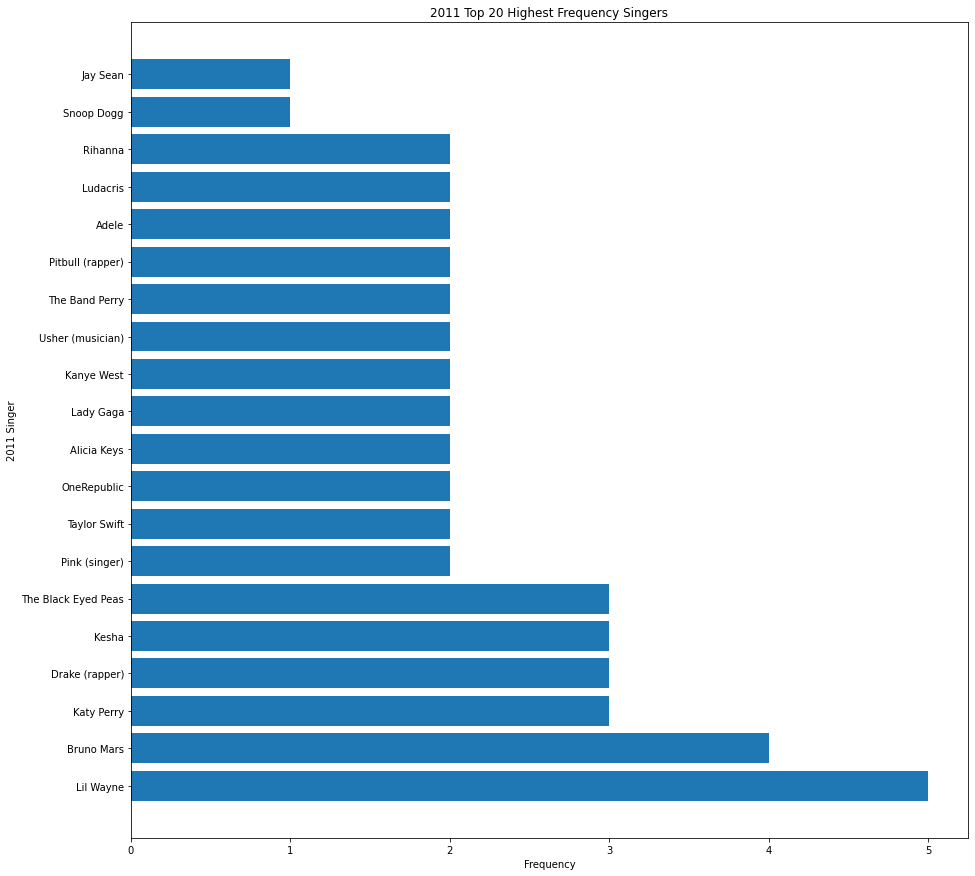

In [124]:
#Plotting Graph 
# Figure Size
fig = plt.figure(figsize =(15,15))
 
# Horizontal Bar Plot
plt.barh(top20_2011.index, top20_2011.values,)
plt.xlabel('Frequency')
plt.ylabel('2011 Singer')
plt.title('2011 Top 20 Highest Frequency Singers')
 
# Show Plot
plt.show()

Lil Wayne hast the highest frequency during the year 2011.

## SUBMISSION DATE: 2nd April 2022 